<a href="https://colab.research.google.com/github/kurokawa5/ML4DS/blob/main/01_simple_linear_regression/01_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1: Download and import the olympic data

In [3]:
import numpy as np 

data = np.loadtxt('/content/drive/MyDrive/05_workspace/09_ml4ds/01_simple_linear_regression/olympic100m.txt', delimiter=',') # load olympic data
data

array([[1896.  ,   12.  ],
       [1900.  ,   11.  ],
       [1904.  ,   11.  ],
       [1906.  ,   11.2 ],
       [1908.  ,   10.8 ],
       [1912.  ,   10.8 ],
       [1920.  ,   10.8 ],
       [1924.  ,   10.6 ],
       [1928.  ,   10.8 ],
       [1932.  ,   10.3 ],
       [1936.  ,   10.3 ],
       [1948.  ,   10.3 ],
       [1952.  ,   10.4 ],
       [1956.  ,   10.5 ],
       [1960.  ,   10.2 ],
       [1964.  ,   10.  ],
       [1968.  ,    9.95],
       [1972.  ,   10.14],
       [1976.  ,   10.06],
       [1980.  ,   10.25],
       [1984.  ,    9.99],
       [1988.  ,    9.92],
       [1992.  ,    9.96],
       [1996.  ,    9.84],
       [2000.  ,    9.87],
       [2004.  ,    9.85],
       [2008.  ,    9.69]])

In [4]:
data.shape

(27, 2)

#### Task 2: Plot the data

Text(0, 0.5, 'Time (seconds)')

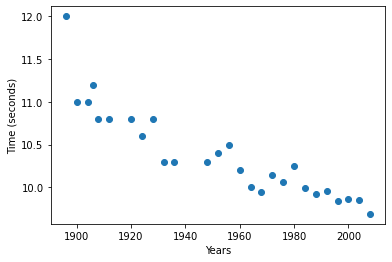

In [5]:
%matplotlib inline
import pylab as plt
x = data[:,0]
t = data[:,1]
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

#### Task 3. Fit a straightline using `LinearRegression` in `sklean`. Plot the model with the data and prediction at 2012.


In [6]:
from sklearn.linear_model import LinearRegression # import 

x = x[:,None] # 27 x 1 array
t = t[:,None] # 27 x 1 array

print(t.shape)
reg = LinearRegression().fit(x, t)

print([reg.intercept_, reg.coef_])

(27, 1)
[array([36.4164559]), array([[-0.01333089]])]


[Sklearn linear regression X and Y input format](https://stackoverflow.com/questions/29462108/sklearn-linear-regression-x-and-y-input-format)

In [7]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
x_test

array([1880.        , 1881.41414141, 1882.82828283, 1884.24242424,
       1885.65656566, 1887.07070707, 1888.48484848, 1889.8989899 ,
       1891.31313131, 1892.72727273, 1894.14141414, 1895.55555556,
       1896.96969697, 1898.38383838, 1899.7979798 , 1901.21212121,
       1902.62626263, 1904.04040404, 1905.45454545, 1906.86868687,
       1908.28282828, 1909.6969697 , 1911.11111111, 1912.52525253,
       1913.93939394, 1915.35353535, 1916.76767677, 1918.18181818,
       1919.5959596 , 1921.01010101, 1922.42424242, 1923.83838384,
       1925.25252525, 1926.66666667, 1928.08080808, 1929.49494949,
       1930.90909091, 1932.32323232, 1933.73737374, 1935.15151515,
       1936.56565657, 1937.97979798, 1939.39393939, 1940.80808081,
       1942.22222222, 1943.63636364, 1945.05050505, 1946.46464646,
       1947.87878788, 1949.29292929, 1950.70707071, 1952.12121212,
       1953.53535354, 1954.94949495, 1956.36363636, 1957.77777778,
       1959.19191919, 1960.60606061, 1962.02020202, 1963.43434

Text(0, 0.5, 'Time (seconds)')

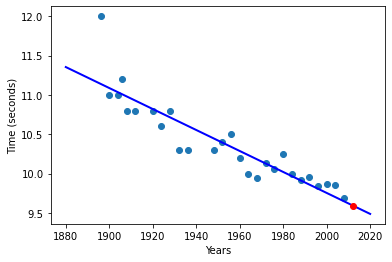

In [8]:
plt.plot(x_test,reg.predict(x_test[:,None]),'b-',linewidth=2) # plot the fitted data

plt.plot(2012,reg.predict(np.array([[2012]])),'ro') # plot the fitted data in 2012 year
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

In [9]:
xbar = x.mean() 
tbar = t.mean()
xxbar = np.multiply(x,x).mean()
xtbar = np.multiply(x,t).mean()
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.3703703703704
10.389629629629631
3812975.5555555555
20268.06814814815


In [10]:
w1 = (tbar*xbar - xtbar)/(xbar*xbar - xxbar)
w0 = tbar-w1*xbar
print(w0)
print(w1)

36.41645590250286
-0.013330885710960602


Text(0, 0.5, 'Time (seconds)')

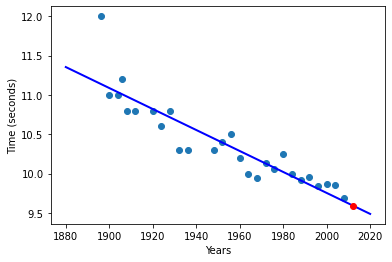

In [11]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
plt.plot(x_test,w0+w1*x_test,'b-',linewidth=2) # plot the fitted data

plt.plot(2012,w0+w1*2012,'ro') # plot the fitted data
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis

#### Task 4: Fit the model with the Least Square solution. Plot the model with the data and prediction at 2012.

Let's fit a model with an analytical solution to the problem of finding the parameters with the minimum average loss. 

Recall that the average loss is $$  L(w_0, w_1) = \frac{1}{N}\sum_{n=1}^N (t_n - w_0 - w_1x_n)^2 $$
$L$ is a function of $w_0$ and $w_1$. All $x_n$ and $t_n$ are given.  

The procedure to find the analytical expression of the optimal parameters is the following:

- Solving $$\frac{\partial L(w_0, w_1)}{\partial w_0} = 0, \quad \frac{\partial L(w_0, w_1)}{\partial w_1} = 0 $$ 
- the average loss is minimised:
$$ w_1 = \frac{\bar{x}\bar{t} - \bar{xt}}{\bar{x}\bar{x} - \bar{x^2}} $$
and
$$ w_0 = \bar{t} - w_1\bar{x} $$
where $\bar{z} = \frac{1}{N}\sum_{n=1}^N z_n$.

You are encouraged to derive these yourself

[【大学数学】最小二乗法(回帰分析)【確率統計】](https://www.youtube.com/watch?v=Zz1sgYxrA-k)

In [12]:
xbar = x.mean() 
tbar = t.mean()
xxbar = np.multiply(x,x).mean()
xtbar = np.multiply(x,t).mean()
print(xbar)
print(tbar)
print(xxbar)
print(xtbar)

1952.3703703703704
10.389629629629631
3812975.5555555555
20268.06814814815


In [14]:
w1 = (tbar*xbar - xtbar)/(xbar*xbar - xxbar)
w0 = tbar-w1*xbar
print(w0)
print(w1)

36.41645590250286
-0.013330885710960602


Text(0, 0.5, 'Time (seconds)')

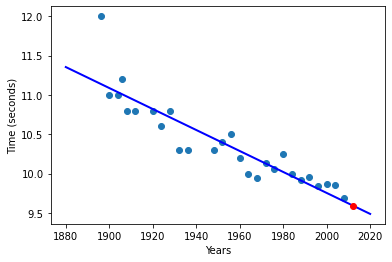

In [15]:
x_test = np.linspace(1880,2020, 100) # generate new x to plot the fitted line. Note better not to use the original x !
plt.plot(x_test,w0+w1*x_test,'b-',linewidth=2) # plot the fitted data

plt.plot(2012,w0+w1*2012,'ro') # plot the fitted data
plt.scatter(x,t) # draw a scatter plot
plt.xlabel('Years') # always label x&y-axis
plt.ylabel('Time (seconds)') # always label x&y-axis